ANALISI DELLO SPETTRO DI AUTOVALORI E RELATIVI AUTOVETTORI DI ALCUNI RETICOLI TRIDIMENSIONALI

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import rigidpy as rp

In [159]:
df = pd.read_excel('/Users/edoardonaggi/Desktop/TESI/Analisi_3D/Reticoli.xlsx')

In [47]:
def string_toarray(dataframe,position1,position2,element):
    if element == "coordinates":
        array = dataframe.iloc[position1][position2]
        array = array.replace("[","")
        array = array.replace("]","")
        array = array.split(',')
        array = np.array(array)
        array = array.astype(float)
        dimensions = 3
        points = int(np.size(array)/dimensions)
        array = np.reshape(array,(points,dimensions))
    
        return array
    if element == "bonds":
        array = dataframe.iloc[position1][position2]
        array = array.replace("[","")
        array = array.replace("]","")
        array = array.split(',')
        array = np.array(array)
        array = array.astype(float)
        dimensions = 2
        points = int(np.size(array)/dimensions)
        array = np.reshape(array,(points,dimensions))
        array = array.astype(int)-1
        
        return array


In [48]:
def count_zeroeigenvalues(eigenvalues):
    k = 0
    for i in range(np.size(eigenvalues)):
        if eigenvalues[i] < np.exp(-22) : 
            k = k + 1
    
    return k
        

STUDIO DEL SIMPLE CUBE

In [63]:
coordinates = string_toarray(df,0,27,element="coordinates")
bonds = string_toarray(df,0,28,element="bonds")
F= rp.framework(coordinates,bonds,basis=[[3,0,0],[0,3,0],[0,0,3]])

Eigenvalues, Eigenvectors = F.eigenSpace(eigvals = None)
print(Eigenvalues)
print(Eigenvectors)
print(count_zeroeigenvalues(Eigenvalues))

[]
[1.11022302e-15 1.11022302e-15 1.11022302e-15 1.11022302e-15
 1.11022302e-15 1.11022302e-15 1.11022302e-15 1.11022302e-15
 1.11022302e-15 1.11022302e-15 1.11022302e-15 1.11022302e-15
 2.00000000e+00 2.00000000e+00 2.00000000e+00 2.00000000e+00
 2.00000000e+00 2.00000000e+00 2.00000000e+00 2.00000000e+00
 2.00000000e+00 2.00000000e+00 2.00000000e+00 2.00000000e+00]
[[ 0.70710678  0.          0.          0.          0.          0.
   0.70710678  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.70710678  0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.70710678  0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.70710678  0.          0.          0.70710678  0.
   0.          0. 

In [104]:
def plotting_lattice(coordinates,bonds):
    plt.rcParams["figure.figsize"] = [7.50, 3.50]
    plt.rcParams["figure.autolayout"] = True
    fig = plt.figure()
    ax = fig.add_subplot(projection="3d")
    ax.scatter(coordinates[:,0],coordinates[:,1],coordinates[:,2], c='red', s=100)

    x= np.zeros((np.size(bonds[:,0]),2))
    y= np.zeros((np.size(bonds[:,0]),2))
    z= np.zeros((np.size(bonds[:,0]),2))


    for i in range(np.size(bonds[:,0])):
        x[i,0] = coordinates[bonds[i,0],0]
        x[i,1] = coordinates[bonds[i,1],0]
        y[i,0] = coordinates[bonds[i,0],1]
        y[i,1] = coordinates[bonds[i,1],1]
        z[i,0] = coordinates[bonds[i,0],2]
        z[i,1] = coordinates[bonds[i,1],2]

    for i in range(np.size(bonds[:,0])):
        ax.plot(x[i,:] , y[i,:], z[i,:], color='black')

    plt.show()

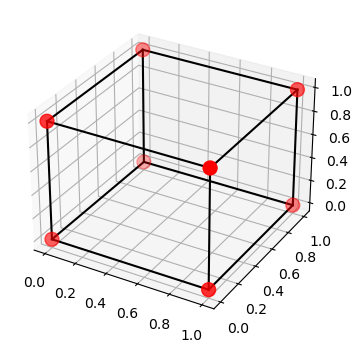

In [105]:
plotting_lattice(coordinates,bonds)

FUNZIONE FINALE, inserendo il nome del reticolo si ottiene la rappresentazione grafica, lo spettro di autovalori e autovettori ed il numero di autovalori nulli

In [161]:
def lattice_analysis(dataframe,cell_name):
    names = dataframe["Name"].tolist()
    for i in range(len(names)):
        if names[i] == cell_name: cell_number = i
    
    coordinates = string_toarray(dataframe,cell_number,27,element="coordinates")
    bonds = string_toarray(dataframe,cell_number,28,element="bonds")
    F= rp.framework(coordinates,bonds,basis=[[3,0,0],[0,3,0],[0,0,3]])

    Eigenvalues, Eigenvectors = F.eigenSpace(eigvals = None)
    plotting_lattice(coordinates,bonds)
    print("Autovalori della matrice: ")
    print(Eigenvalues)
    print("Autovettori della matrice: ")
    print(Eigenvectors)
    print("Numero di autovalori nulli: ")
    print(count_zeroeigenvalues(Eigenvalues))
   

[]


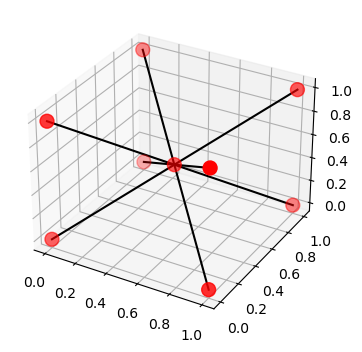

Autovalori della matrice: 
[-6.45215809e-16 -3.20969756e-16 -1.83976740e-16 -1.63342511e-16
 -1.49671915e-16 -8.53627544e-17 -6.53204504e-17 -5.84874456e-17
 -4.08854911e-17 -1.35214468e-17 -1.09383660e-17 -2.62262043e-19
  1.10346437e-19  8.07617555e-18  3.24034708e-17  4.48860298e-17
  1.60458989e-16  2.32030152e-16  1.77635684e-15  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  3.66666667e+00  3.66666667e+00  3.66666667e+00]
Autovettori della matrice: 
[[ 0.00000000e+00 -3.44670035e-02 -3.24723729e-02 -4.40817992e-01
   3.40415461e-01  7.52549831e-01 -7.53118501e-03  9.03506871e-03
   5.50710798e-02 -2.08089985e-01  5.66824369e-02 -4.15144600e-02
  -7.07976022e-02  8.86455064e-02  1.27740992e-01  2.24390064e-02
   2.42395016e-02  6.98368383e-02  1.12976080e-01  6.03894795e-02
  -8.12702225e-02 -6.92883549e-02 -1.91278771e-02  2.14768557e-02
   3.24559002e-02 -4.64266475e-02 -5.29686291e-02]
 [ 0.00000000e+00 -5.54516583e-01 -2.05755083e-01 -4.13472

In [162]:
lattice_analysis(df,cell_name = "ub_Z08.0_E3\n")